In [60]:
import site
import os
import sys
import ssl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sktime

from sktime.datasets._single_problem_loaders import load_UCR_UEA_dataset
ssl._create_default_https_context = ssl._create_unverified_context



print(np.zeros(20))
print(sys.executable)

# Print paths to all site-packages directories
for path in site.getsitepackages():
    print(path)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
/Users/david/Documents/Studium D&E/Applied AI/David_MA/.venv/bin/python
/Users/david/Documents/Studium D&E/Applied AI/David_MA/.venv/lib/python3.11/site-packages


In [61]:
np.random.seed(43)
rand_ind = np.random.choice(3000, 10, replace=False)
rand_ind

array([1323, 1387, 2336, 1857, 2507, 1428,  889,  532,  919,  938])

In [62]:
#"ElectricDevices" "AbnormalHeartbeat" "Adiac"
X, y = load_UCR_UEA_dataset(name="ElectricDevices", split=None, return_X_y=True, return_type=None, extract_path=None)


X = X.rename(columns={'dim_0': 'ts_i'})
ts_o = X.loc[0,:]
print(ts_o)
X["ts_i"][0]
y[rand_ind]

ts_i    0    -0.186109
1    -0.186109
2    -0.186109
3...
Name: 0, dtype: object


array(['5', '5', '7', '2', '7', '6', '4', '3', '4', '4'], dtype='<U1')

In [63]:
unique_values = np.unique(y)
unique_values

array(['1', '2', '3', '4', '5', '6', '7'], dtype='<U1')

/var/folders/bj/qcw9vb7x48j_hnyzlrj_pqtr0000gn/T/ipykernel_3768/2039824064.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 8)


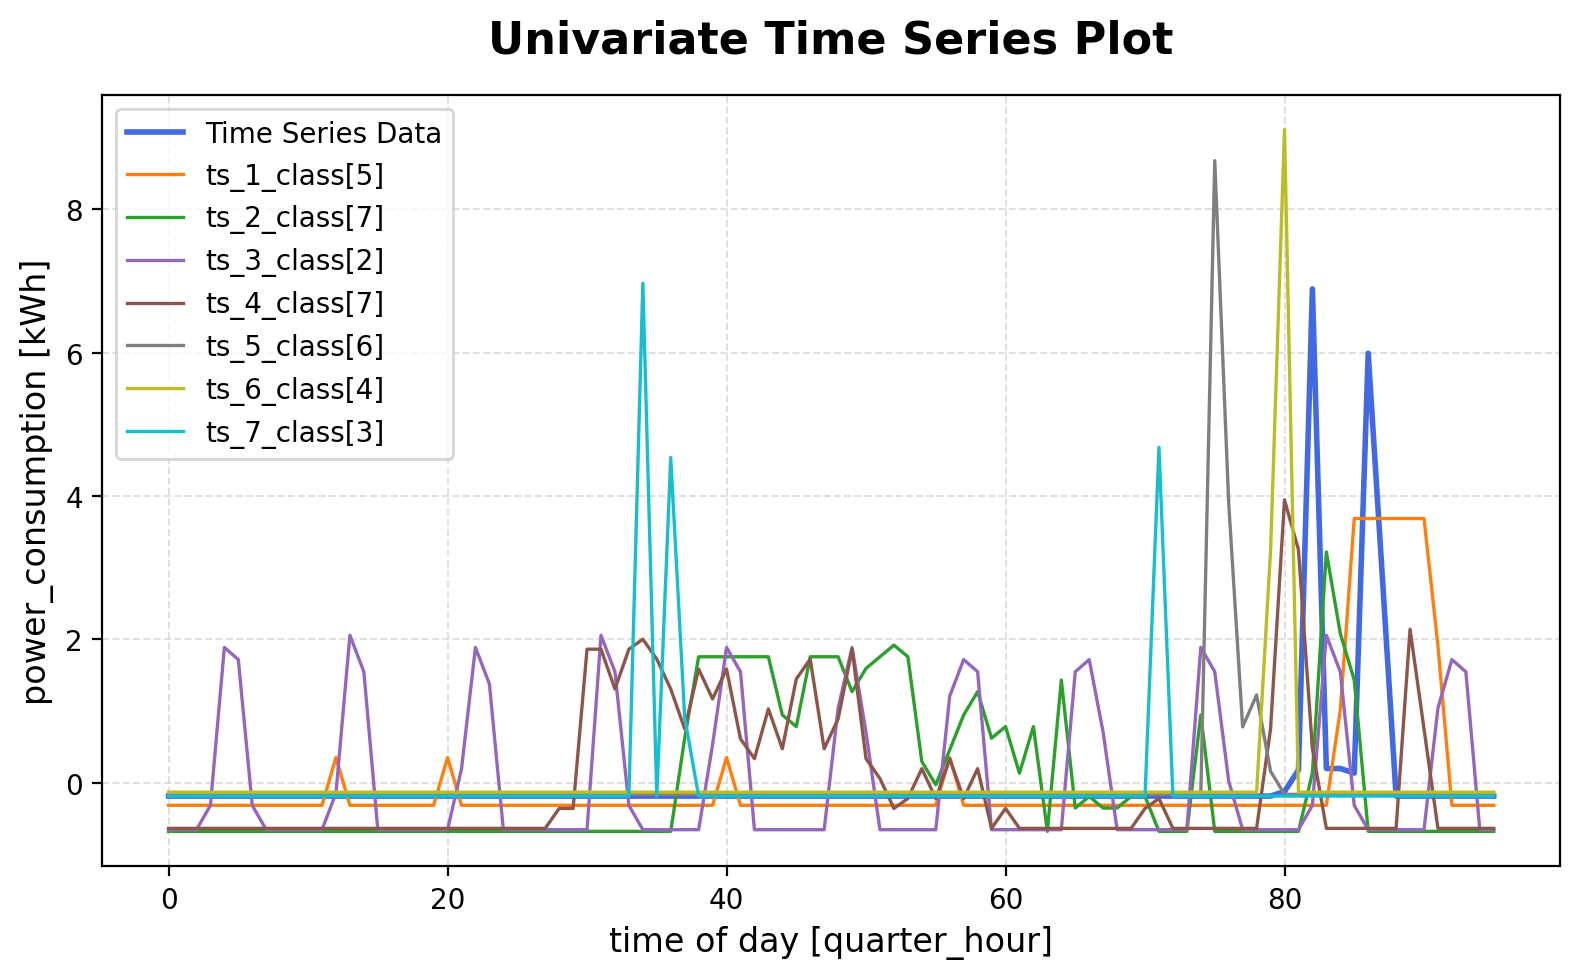

In [6]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
cmap = plt.cm.get_cmap('tab10', 8)

# Customize the plot
ax.plot(X['ts_i'][0], color='royalblue', linewidth=2, label='Time Series Data')

for _col in range(1, 8):
    ax.plot(X["ts_i"][rand_ind[_col]], color=cmap(_col), linewidth=1.2, label="ts_{}_class[{}]".format(_col, y[rand_ind[_col]]))

# Add grid with custom styling
ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)

# Set title and labels
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Univariate Time Series Plot', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('time of day [quarter_hour]', fontsize=12)
ax.set_ylabel('power_consumption [kWh]', fontsize=12)

plt.tight_layout()

In [7]:
def get_first_n_indexes(array, target_class, n=10):
    # Find the indexes where the array matches the target class
    matching_indexes = np.where(array == target_class)[0]
    
    # Return the first n indexes or all indexes if there are less than n
    return matching_indexes[:n]

In [8]:
class_6_ind = get_first_n_indexes(y, target_class="4", n=8)
class_6_ind

array([834, 835, 836, 837, 838, 839, 840, 841])

In [9]:
def get_class_ind_dict(_array, n=8):
    class_ind_dict = {}
    for class_ in np.unique(_array):
        class_ind = get_first_n_indexes(_array, target_class=class_, n=n)
        class_ind_dict[class_] = class_ind
    return class_ind_dict

class_ind_dict = get_class_ind_dict(_array=y)
assumption_encoder = {"1": "dishwasher", "2":"freezer or fridge", "3":"kettle or oven",
                       "4": "washing_machine, oven", "5": "oven", "6": "oven", "7":"television or Computer"}

/var/folders/bj/qcw9vb7x48j_hnyzlrj_pqtr0000gn/T/ipykernel_3768/2533253044.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 8)


Text(0, 0.5, 'power_consumption [kWh]')

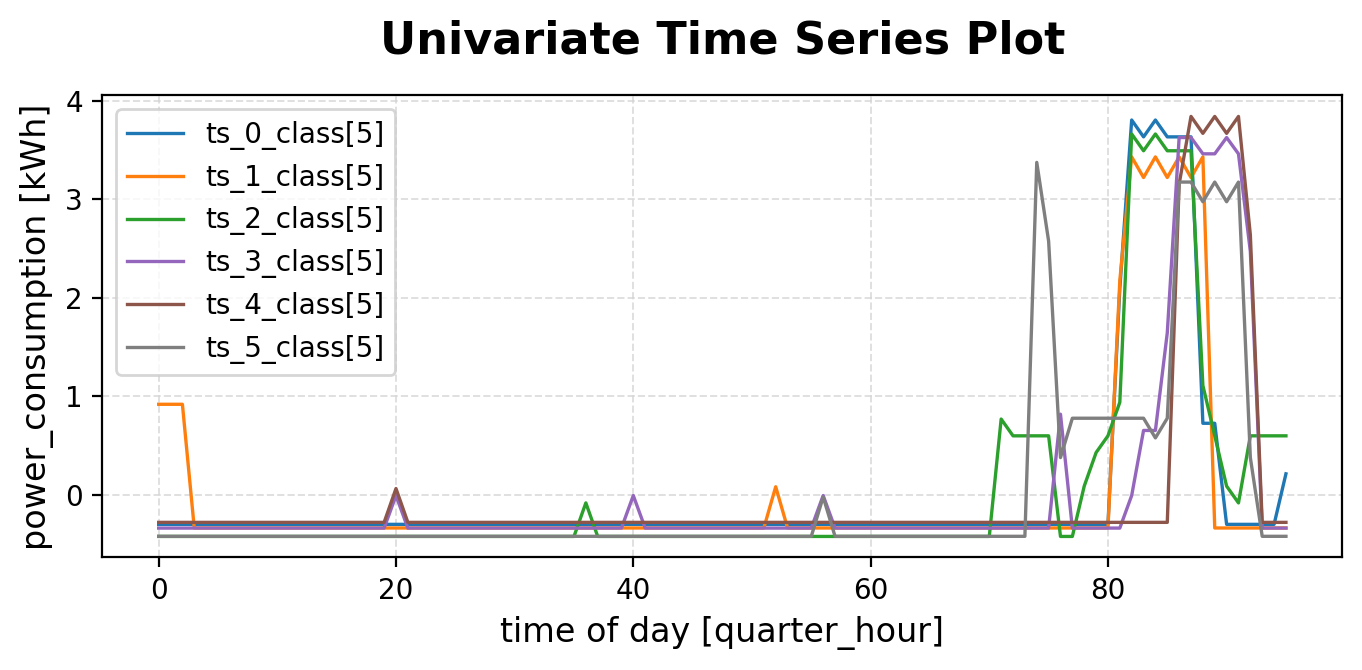

In [13]:
current_class_ = "5"
current_ind_list = class_ind_dict[current_class_]

fig, ax = plt.subplots(figsize=(8, 3), dpi=200)
cmap = plt.cm.get_cmap('tab10', 8)
for _col in range(0, 6):
    ax.plot(X["ts_i"][current_ind_list[_col]], color=cmap(_col), linewidth=1.2, label="ts_{}_class[{}]".format(_col, y[current_ind_list[_col]]))


# Add grid with custom styling
ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)

# Set title and labels
ax.legend(loc='upper left', fontsize=10)
ax.set_title('Univariate Time Series Plot', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('time of day [quarter_hour]', fontsize=12)
ax.set_ylabel('power_consumption [kWh]', fontsize=12)

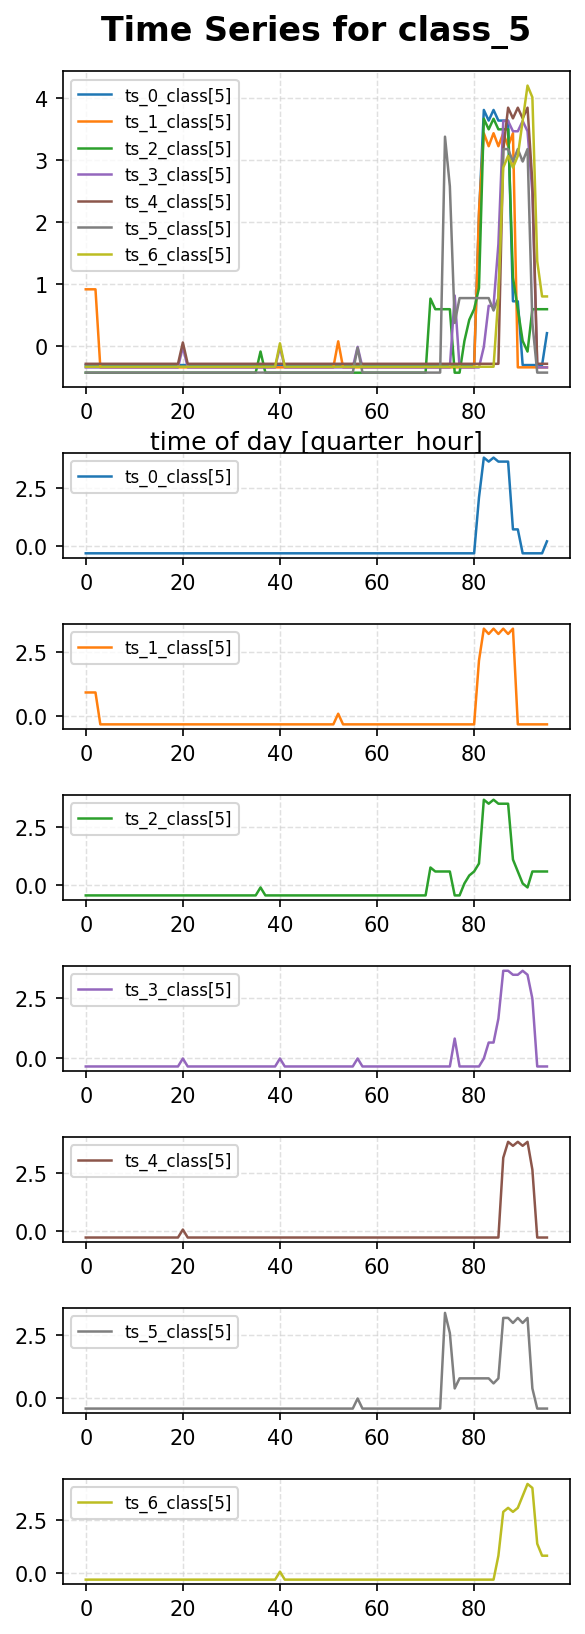

In [14]:
num_of_subplots=8 


# Create 8 subplots where the first plot is the summary_plot of the subsequent 7 independent plots of a given
# time_series of class K where class K is out of the class_pool [1,2,3,4,5,6,7]
fig, axes = plt.subplots(nrows=num_of_subplots, ncols=1, figsize=(4, 11), dpi=150, gridspec_kw={'height_ratios': [3] + [1] * (num_of_subplots-1)})

for _col in range(0, num_of_subplots-1):
    axes[0].plot(X["ts_i"][current_ind_list[_col]], color=cmap(_col), linewidth=1.2,
                 label="ts_{}_class[{}]".format(_col, y[current_ind_list[_col]]))

# Add grid and legend for the summary plot
axes[0].grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)
axes[0].legend(loc='upper left', fontsize=8)
axes[0].set_title("Time Series for class_{}".format(current_class_), fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('time of day [quarter_hour]', fontsize=12)

for _col in range(0, num_of_subplots-1):
    ax = axes[_col + 1]  # Access the subplot (start from index 1)
    ax.plot(X["ts_i"][current_ind_list[_col]], color=cmap(_col), linewidth=1.2,
            label="ts_{}_class[{}]".format(_col, y[current_ind_list[_col]]))
    
    # Add grid and legend to each independent subplot
    ax.grid(color='#d3d3d3', linestyle='--', linewidth=0.7, alpha=0.7)
    ax.legend(loc='upper left', fontsize=8)
    #ax.set_title("time_series_class_{}".format(current_class_))
    #ax.set_xlabel('time of day [quarter_hour]', fontsize=12)

# Adjust spacing between subplots for better visibility
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Increase this value to create more space between plots
plt.show()

In [99]:
#"ElectricDevices" "AbnormalHeartbeat" "Adiac"
X_train, y_train = load_UCR_UEA_dataset(name="ElectricDevices", split="train", return_X_y=True, return_type="numpy3D", extract_path=None)
X_test, y_test = load_UCR_UEA_dataset(name="ElectricDevices", split="train", return_X_y=True, return_type="numpy3D", extract_path=None)


# Shuffle indices and select a smaller subset
reduction_factor= 25
train_indices = np.random.permutation(len(X_train))
test_indices = np.random.permutation(len(X_test))
reduced_train_indices = train_indices[:len(X_train) // reduction_factor]
reduced_test_indices = test_indices[:len(X_test) // reduction_factor]


X_train_small, y_train_small = X_train[reduced_train_indices], y_train[reduced_train_indices]
X_test_small, y_test_small = X_test[reduced_test_indices], y_test[reduced_test_indices]
#---> Different return types ! 

train_test_arrays = {"X_train": X_train, "y_train": y_train, "X_test": X_test, "y_test": y_test,
                     "X_train_small": X_train_small,"y_train_small": y_train_small, "X_test_small": X_test_small,"y_test_small": y_test_small }

for name, array in train_test_arrays.items():
    print(f"{name:<20}: {array.shape}")

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (8926, 1, 96)
y_test              : (8926,)
X_train_small       : (357, 1, 96)
y_train_small       : (357,)
X_test_small        : (357, 1, 96)
y_test_small        : (357,)


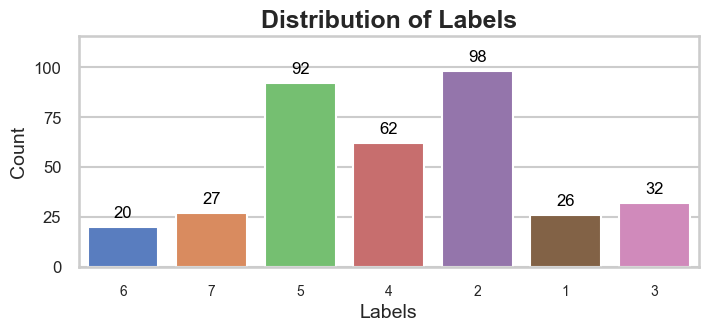

In [114]:
sns.set_theme(style="whitegrid", context="talk")
y_df = pd.DataFrame(y_train_small, columns=["Label"])

# Create the count plot
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=y_df, x=y_df["Label"], hue=y_df["Label"] ,palette='muted') #order=Y_data['activity_label'].value_counts().index)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Customizing plot aesthetics
ax.set_title('Distribution of Labels', fontsize=18, weight='bold')
ax.set_xlabel('Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
max_count = y_df.value_counts().max()  # Find the max count
y_lim = plt.ylim(0, max_count * 1.18)  # Increase the y-axis limit by 20%
x_ticks= plt.xticks(fontsize=10)
y_ticks = plt.yticks(fontsize=12)

In [116]:
from aeon.classification.interval_based import TimeSeriesForestClassifier
#from aeon.classification.shapelet_based import RandomShapeletFo
from aeon.classification.deep_learning import CNNClassifier
from sklearn.metrics import accuracy_score

tsf = TimeSeriesForestClassifier(n_estimators=100, random_state=0)
tsf.fit(X_train_small, y_train_small)
y_pred = tsf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7288819179923818

In [ ]:

from tsml.datasets import load_minimal_chinatown

from tsml_eval.estimators import SklearnToTsmlClassifier
from tsml_eval.publications.y2023.tsc_bakeoff import _set_bakeoff_classifier
from tsml_eval.utils.estimator_validation import is_sklearn_classifier

ModuleNotFoundError: No module named 'tsml'

In [54]:
#"ElectricDevices" "AbnormalHeartbeat" "Adiac"
X, y = load_UCR_UEA_dataset(name="WalkingSittingStanding", split=None, return_X_y=True, return_type=None, extract_path=None)


#X = X.rename(columns={'dim_0': 'ts_i'})
ts_o = X.loc[0,:]
y = np.array(y, dtype=float)
y[rand_ind]
X

,dim_0,dim_1,dim_2
0,0 0.190438 1 0.191055 2 0.18997...,0 0.787861 1 0.787151 2 0.78758...,0 0.573399 1 0.569872 2 0.57116...
1,0 0.612601 1 0.664970 2 0.78970...,0 -0.280099 1 -0.302210 2 -0.30297...,0 -0.269342 1 -0.325906 2 -0.34448...
2,0 1.020397 1 1.029663 2 1.03223...,0 -0.080171 1 -0.097238 2 -0.13546...,0 -0.070868 1 -0.076643 2 -0.09466...
3,0 1.003562 1 1.003223 2 1.00128...,0 -0.255776 1 -0.253713 2 -0.25324...,0 -0.013447 1 -0.017988 2 -0.01709...
4,0 0.955021 1 0.959747 2 0.96393...,0 -0.317142 1 -0.323309 2 -0.32928...,0 -0.202901 1 -0.212252 2 -0.20992...
...,...,...,...
10294,0 1.069760 1 1.085756 2 1.14466...,0 -0.021283 1 -0.046313 2 -0.16782...,0 -0.247392 1 -0.243601 2 -0.29243...
10295,0 0.926526 1 0.951442 2 0.98366...,0 -0.030385 1 -0.043346 2 -0.06432...,0 -0.275710 1 -0.258489 2 -0.22410...
10296,0 0.821350 1 0.799200 2 0.80046...,0 -0.248462 1 -0.223260 2 -0.17901...,0 -0.221693 1 -0.204556 2 -0.25687...
10297,0 1.037668 1 0.878073 2 0.89639...,0 -0.397153 1 -0.284863 2 -0.26353...,0 -0.394082 1 -0.315110 2 -0.21390...


In [48]:
Y_data=pd.DataFrame({"activity":y.astype(int)})

label_mapping = {
    0: 'Walking',
    1: 'Walking Upstairs',
    2: 'Walking Downstairs',
    3: 'Sitting',
    4: 'Standing',
    5: 'Laying down'
}

# Replace integer labels with string labels
y_encoded = [label_mapping[val] for val in y]
y_back_encoder = {value_: key_ for key_,value_ in label_mapping.items()}
Y_data["activity_label"]=y_encoded
Y_data.head()


,activity,activity_label
0,5,Laying down
1,1,Walking Upstairs
2,1,Walking Upstairs
3,4,Standing
4,4,Standing


/var/folders/bj/qcw9vb7x48j_hnyzlrj_pqtr0000gn/T/ipykernel_3768/1175571176.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=Y_data, x='activity_label', palette='muted') #order=Y_data['activity_label'].value_counts().index)


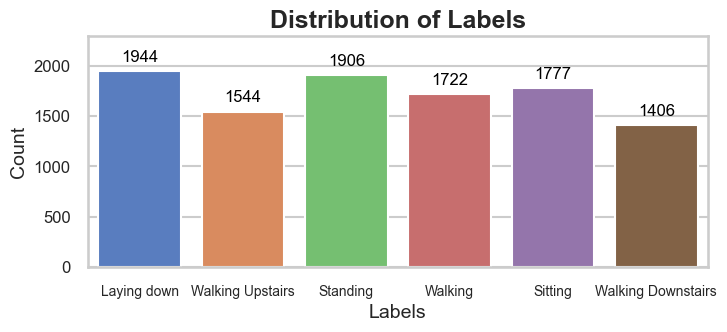

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set a professional Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Create the count plot
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=Y_data, x='activity_label', palette='muted') #order=Y_data['activity_label'].value_counts().index)

# Add annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Customizing plot aesthetics
ax.set_title('Distribution of Labels', fontsize=18, weight='bold')
ax.set_xlabel('Labels', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
max_count = Y_data['activity_label'].value_counts().max()  # Find the max count
plt.ylim(0, max_count * 1.18)  # Increase the y-axis limit by 20%
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

# Save the plot (optional)
# plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [45]:
current_class_ = 2
class_ind_dict_ = get_class_ind_dict(_array=Y_data["activity"])
class_ind_dict_

{0: array([ 5, 18, 21, 36, 40, 42, 52, 58]),
 1: array([ 1,  2,  8, 16, 19, 32, 41, 46]),
 2: array([ 9, 11, 20, 23, 25, 26, 43, 44]),
 3: array([ 6, 10, 12, 14, 29, 31, 38, 50]),
 4: array([ 3,  4,  7, 22, 28, 30, 34, 37]),
 5: array([ 0, 13, 15, 17, 24, 27, 33, 35])}

In [49]:
X

,ts_i,dim_1,dim_2
0,0 0.190438 1 0.191055 2 0.18997...,0 0.787861 1 0.787151 2 0.78758...,0 0.573399 1 0.569872 2 0.57116...
1,0 0.612601 1 0.664970 2 0.78970...,0 -0.280099 1 -0.302210 2 -0.30297...,0 -0.269342 1 -0.325906 2 -0.34448...
2,0 1.020397 1 1.029663 2 1.03223...,0 -0.080171 1 -0.097238 2 -0.13546...,0 -0.070868 1 -0.076643 2 -0.09466...
3,0 1.003562 1 1.003223 2 1.00128...,0 -0.255776 1 -0.253713 2 -0.25324...,0 -0.013447 1 -0.017988 2 -0.01709...
4,0 0.955021 1 0.959747 2 0.96393...,0 -0.317142 1 -0.323309 2 -0.32928...,0 -0.202901 1 -0.212252 2 -0.20992...
...,...,...,...
10294,0 1.069760 1 1.085756 2 1.14466...,0 -0.021283 1 -0.046313 2 -0.16782...,0 -0.247392 1 -0.243601 2 -0.29243...
10295,0 0.926526 1 0.951442 2 0.98366...,0 -0.030385 1 -0.043346 2 -0.06432...,0 -0.275710 1 -0.258489 2 -0.22410...
10296,0 0.821350 1 0.799200 2 0.80046...,0 -0.248462 1 -0.223260 2 -0.17901...,0 -0.221693 1 -0.204556 2 -0.25687...
10297,0 1.037668 1 0.878073 2 0.89639...,0 -0.397153 1 -0.284863 2 -0.26353...,0 -0.394082 1 -0.315110 2 -0.21390...
